##### Links

In [18]:
url_train = './data/train.csv'
url_test  = './data/test.csv'
url_theme = './asset/theme.mplstyle'

##### Libraries

In [19]:
# dataframe library
import pandas as pd

# statistic library
import statsmodels.api as sm

# chart library
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use(url_theme)

##### Retrieve

In [20]:
# train dataframe object
df_train = pd.read_csv(url_train)

# test dataframe object
df_test = pd.read_csv(url_test)

In [21]:
df_train # view dataframe

,BATTERY,BLUETOOTH,CLOCK,DUALSIM,FCAMERA,FOURG,STORAGE,DEPTH,WEIGHT,CORES,...,PXHEIGHT,PXWIDTH,RAM,HEIGHT,WIDTH,TALKTIME,THREEG,TOUCH,WIFI,PRICE
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [22]:
df_test # view dataframe

,ID,BATTERY,BLUETOOTH,CLOCK,DUALSIM,FCAMERA,FOURG,STORAGE,DEPTH,WEIGHT,...,PXHEIGHT,PXWIDTH,RAM,HEIGHT,WIDTH,TALKTIME,THREEG,TOUCH,WIFI,PRICE
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,NaN
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,NaN
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,NaN
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,NaN
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,NaN
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,NaN
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,NaN
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,NaN


##### Relation

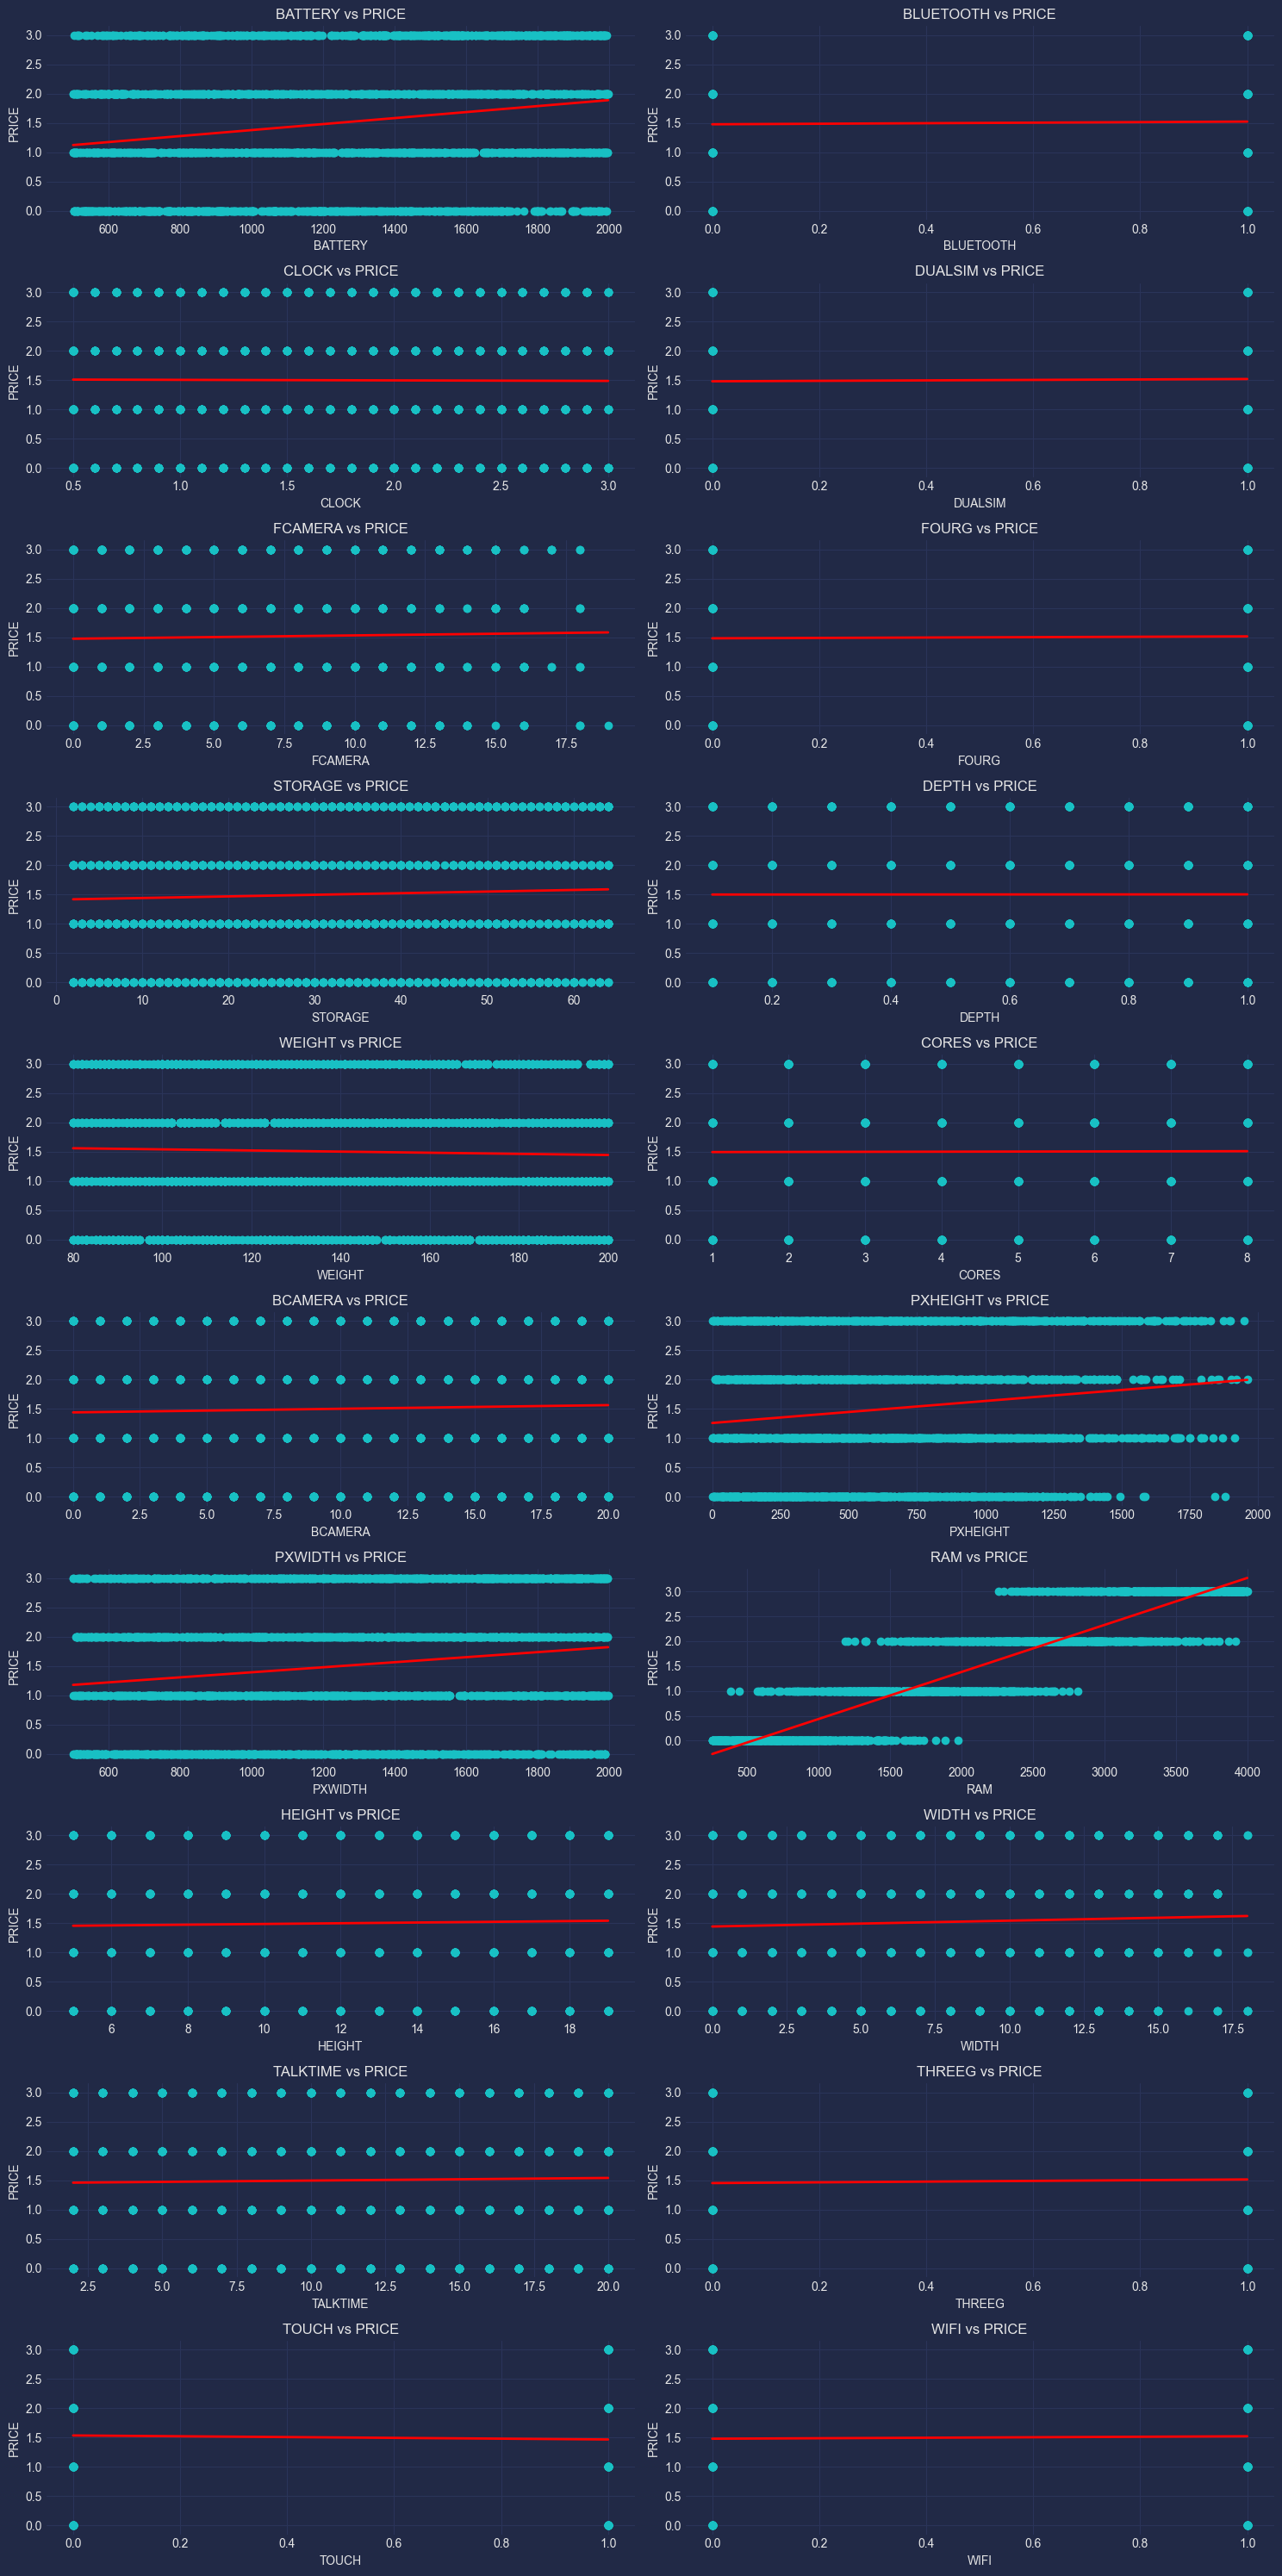

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_train is your training DataFrame
features = [
    'BATTERY', 'BLUETOOTH', 'CLOCK', 'DUALSIM', 'FCAMERA', 'FOURG', 'STORAGE',
    'DEPTH', 'WEIGHT', 'CORES', 'BCAMERA', 'PXHEIGHT', 'PXWIDTH', 'RAM', 'HEIGHT',
    'WIDTH', 'TALKTIME', 'THREEG', 'TOUCH', 'WIFI'
]

# setup subplots
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 30))

# Iterate over features and create scatter plots with regression lines
for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    axes[row, col].set_title(f'{feature} vs PRICE')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('PRICE')
    
    # Scatter plot
    axes[row, col].scatter(df_train[feature], df_train['PRICE'])
    
    # Regression line
    x_vals = np.linspace(df_train[feature].min(), df_train[feature].max(), 100)
    slope, intercept = np.polyfit(df_train[feature], df_train['PRICE'], 1)
    y_vals = slope * x_vals + intercept
    
    axes[row, col].plot(x_vals, y_vals, color='red', linewidth=2)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [29]:
# Add a constant term to the predictors
X = sm.add_constant(df_train[['BATTERY', 'BLUETOOTH', 'CLOCK', 'DUALSIM', 'FCAMERA', 'FOURG', 'STORAGE', 'DEPTH', 'WEIGHT', 'CORES', 'BCAMERA', 'PXHEIGHT', 'PXWIDTH', 'RAM', 'HEIGHT', 'WIDTH', 'TALKTIME', 'THREEG', 'TOUCH', 'WIFI']])

# Fit the model
model = sm.OLS(df_train['PRICE'], X).fit()

# view the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1117.
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:54:40   Log-Likelihood:                -552.26
No. Observations:                2000   AIC:                             1147.
Df Residuals:                    1979   BIC:                             1264.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5750      0.062    -25.553      0.000      -1.696      -1.454
BATTERY        0.0005   1.64e-05     31.071      0.000       0.000       0.001
BLUETOOTH     -0.0020      0.014     -0.141      0.888      -0.030       0.026
CLOCK         -0.0121      0.009     -1.368      0.171      -0.029       0.005
DUALSIM       -0.0237      0.014     -1.644      0.100      -0.052       0.005
FCAMERA        0.0009      0.002      0.432      0.666      -0.003       0.005
FOURG         -0.0015      0.018     -0.083      0.934      -0.036       0.033
STORAGE        0.0009      0.000      2.178      0.030    8.61e-05       0.002
DEPTH         -0.0100      0.025     -0.399      0.690      -0.059       0.039
WEIGHT        -0.0009      0.000     -4.335      0.000      -0.001      -0.000
CORES          0.0018      0.003      0.579      0.563      -0.004       0.008
BCAMERA        0.0001      0.002      0.083      0.934      -0.003       0.003
PXHEIGHT       0.0003   1.89e-05     14.626      0.000       0.000       0.000
PXWIDTH        0.0003   1.94e-05     14.437      0.000       0.000       0.000
RAM            0.0009   6.64e-06    142.688      0.000       0.001       0.001
HEIGHT         0.0011      0.002      0.575      0.565      -0.003       0.005
WIDTH         -0.0003      0.002     -0.171      0.864      -0.004       0.003
TALKTIME       0.0004      0.001      0.276      0.783      -0.002       0.003
THREEG         0.0270      0.021      1.301      0.193      -0.014       0.068
TOUCH         -0.0057      0.014     -0.397      0.691      -0.034       0.022
WIFI          -0.0214      0.014     -1.489      0.137      -0.050       0.007
==============================================================================
Omnibus:                      114.748   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.786
Skew:                           0.038   Prob(JB):                     3.10e-10
Kurtosis:                       2.279   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""